In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 11})

In [2]:
def gridspacing_var_to_array(var, nz):
    L = 5e-3
    vars = np.array(['cmts', 'ch2', 'chcl','d','phi','xi'])
#          var_index= 0       1      2      3   4     5
    var_index = var
    which_var = str(vars[var_index])
    
    with open(r'/Users/jjmarzia/Desktop/cvisim/dt_spacing/jul3-dt/'+which_var+'/a1_'+str(nz)+'.txt','r') as file:
        data = file.read().split(' ')
        # print(data)
        i=0
        for i in range(len(data)):
            if '\n' in data[i]:
                data[i] = data[i].replace('\n', '')
            i=i+1
        # print(data)
        data = [i for i in data if i]
        data = np.array(data)
        data = data.astype(float)
    # if var_index == 5:
        return np.linspace(0,L, 28), data, which_var
    # else:
    #     return np.linspace(0,L, nz), data, which_var

In [7]:
def plot_all_grids(var):
    fig, ax = plt.subplots(figsize = (5,3), layout='constrained')

    nzs = np.array(['0.1', '0.5', '1', '2.5', '5', '7.5', '10', '25', '50', '100'])
    i=0
    for i in range(len(nzs)):
        fsol = gridspacing_var_to_array(var,nzs[i])
        plt.plot(fsol[0], fsol[1],label=str(fsol[2])+' nz '+str(nzs[i]))
        i = i+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    # plt.ylim([0,1])

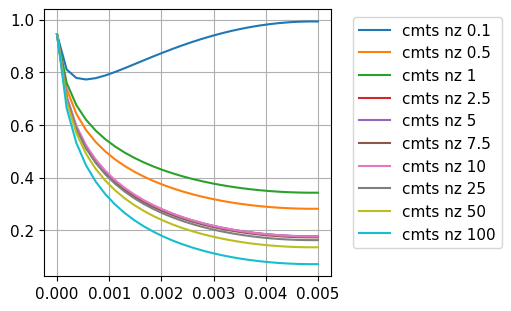

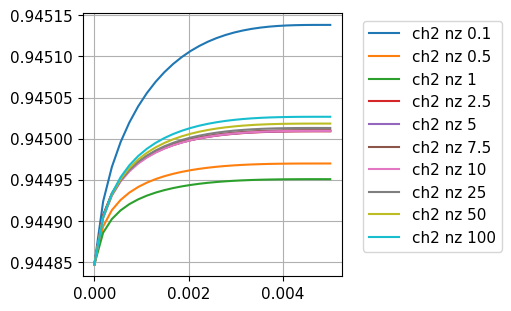

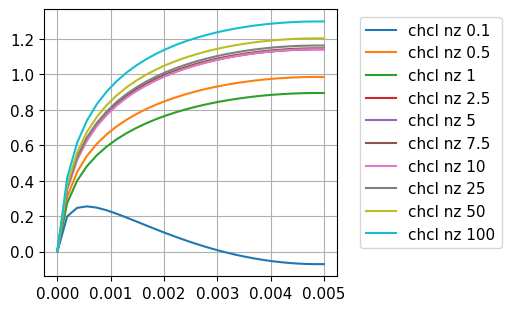

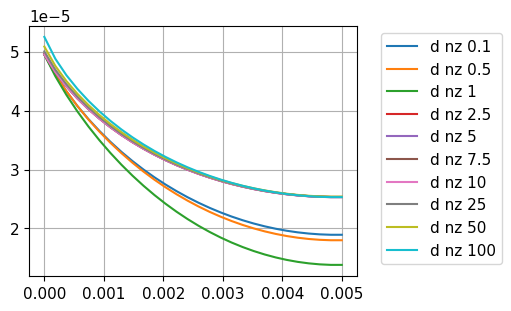

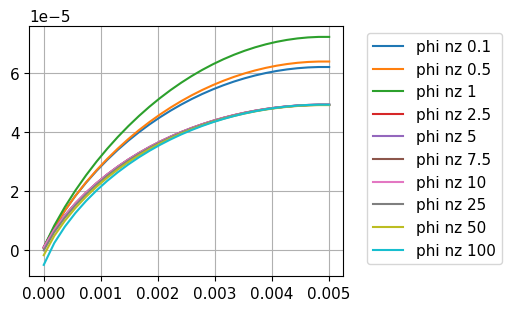

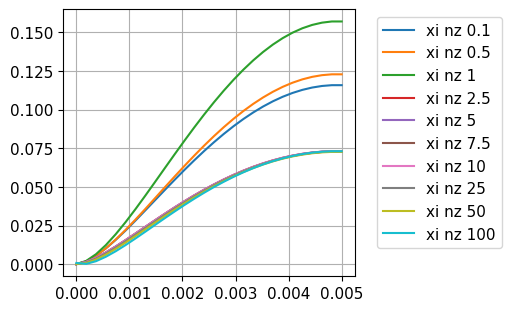

In [8]:
# gridspacing_var_to_array(var_index, nz)

plot_all_grids(0)
plot_all_grids(1)
plot_all_grids(2)
plot_all_grids(3)
plot_all_grids(4)
plot_all_grids(5)